### Ejemplo de dataframes para gráfica de barras apiladas y agrupadas

In [1]:
import pandas as pd

desaparecidos = pd.DataFrame({
    'Desaparecidos (Menor)': [3000, 4000, 2000, 4000],
    'Desaparecidos (Mayor)': [2000, 3000, 1000, 2500]
    }, index=['Hombre', 'Mujer', 'No definido', 'Total'])

desaparecidos

,Desaparecidos (Menor),Desaparecidos (Mayor)
Hombre,3000,2000
Mujer,4000,3000
No definido,2000,1000
Total,4000,2500


In [2]:
homicidios = pd.DataFrame({
    'Homicidios (Menor)': [10000, 3000, 4000, 500],
    'Homicidios (Mayor)': [2000, 1000, 5000, 3000]
    }, index=['Hombre', 'Mujer', 'No definido', 'Total'])

homicidios

,Homicidios (Menor),Homicidios (Mayor)
Hombre,10000,2000
Mujer,3000,1000
No definido,4000,5000
Total,500,3000


In [3]:
localizados = pd.DataFrame({
    'Localizados (Menor)': [1000, 1500, 5000, 2500],
    'Localizados (Mayor)': [5000, 2300, 4000, 2000]
    }, index=['Hombre', 'Mujer', 'No definido', 'Total'])

localizados

,Localizados (Menor),Localizados (Mayor)
Hombre,1000,5000
Mujer,1500,2300
No definido,5000,4000
Total,2500,2000


In [4]:
encontrados = pd.DataFrame({
    'Encontrados (Menor)': [6000, 3500, 2000, 1500],
    'Encontrados (Mayor)': [4000, 5000, 2500, 3000]
    }, index=['Hombre', 'Mujer', 'No definido', 'Total'])

encontrados

,Encontrados (Menor),Encontrados (Mayor)
Hombre,6000,4000
Mujer,3500,5000
No definido,2000,2500
Total,1500,3000


Wide a long

In [8]:
homicidios_long = homicidios.reset_index().melt(
    id_vars='index',
    var_name='Tipo_Edad',
    value_name='Cantidad'
).rename(columns={'index': 'Sexo'})

# Separar la columna 'Tipo_Edad' en dos: 'Tipo' y 'Edad'
homicidios_long[['Tipo', 'Edad']] = homicidios_long['Tipo_Edad'].str.extract(r'(\w+) \((\w+)\)')

# Mostrar resultado
print(homicidios_long)


          Sexo           Tipo_Edad  Cantidad        Tipo   Edad
0       Hombre  Homicidios (Menor)     10000  Homicidios  Menor
1        Mujer  Homicidios (Menor)      3000  Homicidios  Menor
2  No definido  Homicidios (Menor)      4000  Homicidios  Menor
3        Total  Homicidios (Menor)       500  Homicidios  Menor
4       Hombre  Homicidios (Mayor)      2000  Homicidios  Mayor
5        Mujer  Homicidios (Mayor)      1000  Homicidios  Mayor
6  No definido  Homicidios (Mayor)      5000  Homicidios  Mayor
7        Total  Homicidios (Mayor)      3000  Homicidios  Mayor


In [9]:
desaparecidos_long = desaparecidos.reset_index().melt(
    id_vars='index',
    var_name='Tipo_Edad',
    value_name='Cantidad'
).rename(columns={'index': 'Sexo'})

# Separar la columna 'Tipo_Edad' en dos: 'Tipo' y 'Edad'
desaparecidos_long[['Tipo', 'Edad']] = desaparecidos_long['Tipo_Edad'].str.extract(r'(\w+) \((\w+)\)')

# Mostrar resultado
print(desaparecidos_long)


          Sexo              Tipo_Edad  Cantidad           Tipo   Edad
0       Hombre  Desaparecidos (Menor)      3000  Desaparecidos  Menor
1        Mujer  Desaparecidos (Menor)      4000  Desaparecidos  Menor
2  No definido  Desaparecidos (Menor)      2000  Desaparecidos  Menor
3        Total  Desaparecidos (Menor)      4000  Desaparecidos  Menor
4       Hombre  Desaparecidos (Mayor)      2000  Desaparecidos  Mayor
5        Mujer  Desaparecidos (Mayor)      3000  Desaparecidos  Mayor
6  No definido  Desaparecidos (Mayor)      1000  Desaparecidos  Mayor
7        Total  Desaparecidos (Mayor)      2500  Desaparecidos  Mayor


In [10]:
localizados_long = localizados.reset_index().melt(
    id_vars='index',
    var_name='Tipo_Edad',
    value_name='Cantidad'
).rename(columns={'index': 'Sexo'})

# Separar la columna 'Tipo_Edad' en dos: 'Tipo' y 'Edad'
localizados_long[['Tipo', 'Edad']] = localizados_long['Tipo_Edad'].str.extract(r'(\w+) \((\w+)\)')

# Mostrar resultado
print(localizados_long)

          Sexo            Tipo_Edad  Cantidad         Tipo   Edad
0       Hombre  Localizados (Menor)      1000  Localizados  Menor
1        Mujer  Localizados (Menor)      1500  Localizados  Menor
2  No definido  Localizados (Menor)      5000  Localizados  Menor
3        Total  Localizados (Menor)      2500  Localizados  Menor
4       Hombre  Localizados (Mayor)      5000  Localizados  Mayor
5        Mujer  Localizados (Mayor)      2300  Localizados  Mayor
6  No definido  Localizados (Mayor)      4000  Localizados  Mayor
7        Total  Localizados (Mayor)      2000  Localizados  Mayor


### **Código a copiar para grafica de barras apiladas y agrupadas:**

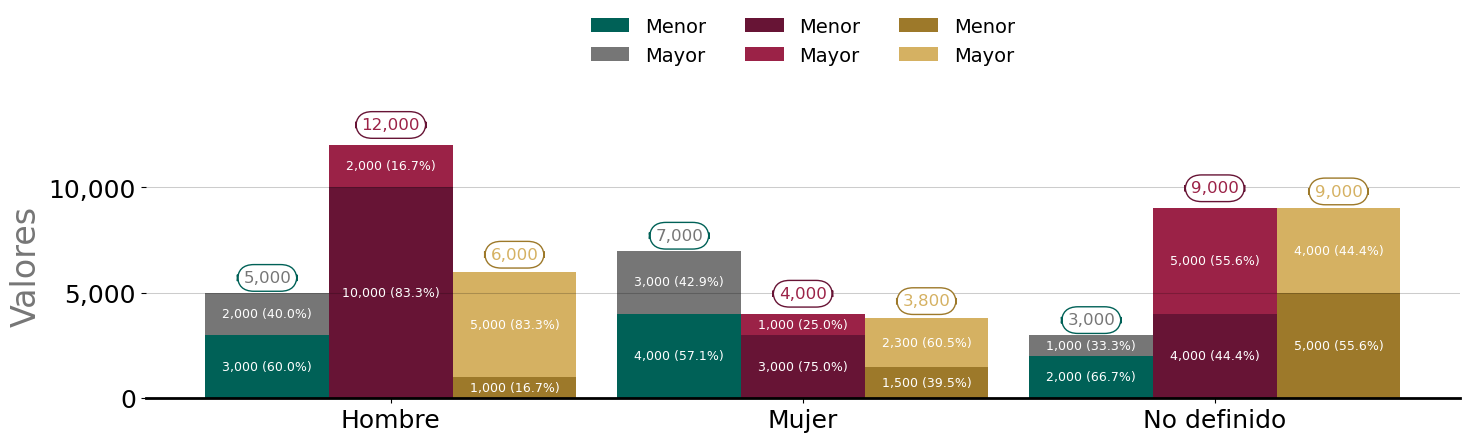

In [16]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.font_manager as font_manager
import numpy as np

# VARIABLES A CAMBIAR:
dataframes_a_graficar = [
    desaparecidos_long[desaparecidos_long['Sexo'] != 'Total'],
    homicidios_long[homicidios_long['Sexo'] != 'Total'],
    localizados_long[localizados_long['Sexo'] != 'Total']
]

# Configurar las fuentes SVG como texto editable
plt.rcParams['svg.fonttype'] = 'none'

# Ruta relativa para las fuentes
font_dirs = [Path("fonts/arial")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Crear una instancia de FontProperties para Arial
arial_font = font_manager.FontProperties(fname=str(font_files[0]))


def agrupadasyapiladas(dataframes):
    """
    Genera una gráfica de barras apiladas agrupadas para múltiples DataFrames.

    Args:
        dataframes (list of pd.DataFrame): Lista de DataFrames con los datos de los grupos de subgrupos apilados.
        font_size (int): Tamaño de la fuente para los elementos de la gráfica.
    """

    font_config = {
        'family': 'Arial',  # Cambiar a Arial
        'titulo': {'size': 36, 'weight': 'medium', 'color': '#000000'},
        'eje_y': {'size': 18, 'weight': 'medium', 'color': '#000000'},
        'eje_x': {'size': 18, 'weight': 'medium', 'color': '#000000'},
        'etiquetas_eje_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'etiquetas_eje_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'capsula_valor': {'size': 9, 'weight': 'medium', 'color': '#10302C'},
        'capsula_max': {'size': 12, 'weight': 'medium', 'color': 'white'},
        'porcentaje': {'size': 10, 'weight': 'medium', 'color': '#4C6A67'},
        'leyenda': {'size': 14, 'weight': 'medium', 'color': '#767676'}  # Nueva categoría para la leyenda
    }

    # Configuración de los grupos y subgrupos
    grupos = dataframes[0]['Sexo'].unique().tolist()
    subgrupos_list = [df['Edad'].unique().tolist() for df in dataframes]

    # Obtener colores desde la función colores()
    lista_colores = ["#006157", "#767676", "#671435", "#9B2247", "#9D792A", "#D5B162", "#10302C", "#E6D194", "#018477", "#FF6666", "#00008B", "#854991"]
    colores_por_grupo = []
    color_index = 0
    for subgrupos in subgrupos_list:
        colores_por_grupo.append(lista_colores[color_index:color_index + len(subgrupos)])
        color_index += len(subgrupos)

    # Configuración visual
    factor_ancho = 1.5  # Factor ajustable para determinar el ancho total
    ancho_total = len(grupos) * factor_ancho  # Ancho total dinámico basado en el número de grupos
    max_subgrupos = max(len(df.columns) for df in dataframes)
    ancho_barra = ancho_total / (len(dataframes) * max_subgrupos)
    desplazamiento = -ancho_total / 2 + ancho_barra / 2  # Ajustar el desplazamiento inicial

    # Configurar el tamaño de la figura en píxeles
    ancho_px = 1480
    alto_px = 520
    dpi = 100  # Resolución en píxeles por pulgada
    ancho_in = ancho_px / dpi
    alto_in = alto_px / dpi

    # Crear la figura con el tamaño especificado
    fig, ax = plt.subplots(figsize=(ancho_in, alto_in), dpi=dpi)
    x_pos = np.arange(len(grupos))

    # Dibujar barras apiladas para cada DataFrame
    for df, colores, offset in zip(dataframes, colores_por_grupo, range(len(dataframes))):
        bottom = np.zeros(len(grupos))  # Inicializar con ceros
        total_grupo = (
            df.groupby("Sexo")["Cantidad"].sum()
            .reindex(grupos)
            .values
            )
        # Usar los valores únicos de 'Edad' en vez de df.columns
        subgrupos = df['Edad'].unique().tolist()
        for subgrupo, color in zip(subgrupos, colores):
            valores = df[df['Edad'] == subgrupo].sort_values('Sexo')['Cantidad'].values
            # Asegurarse de que valores tenga la misma longitud que grupos
            if len(valores) < len(grupos):
                # Rellenar con ceros si faltan valores
                valores = np.pad(valores, (0, len(grupos) - len(valores)), 'constant')
            ax.bar(
                x_pos + desplazamiento,
                valores,
                width=ancho_barra,
                bottom=bottom,
                color=color,
                label=subgrupo,
            )
            # Calcular el tamaño dinámico de la fuente basado en el ancho de la barra
            font_size_dynamic = max(1, min(12, int(ancho_barra * 40)))

            # Agregar etiquetas dentro de las barras
            for i, valor in enumerate(valores):
                porcentaje = (valor / total_grupo[i]) * 100 if total_grupo[i] != 0 else 0
                ax.text(
                    x_pos[i] + desplazamiento,
                    bottom[i] + valor / 2,  # Posición vertical centrada en la barra
                    f"{int(valor):,} ({porcentaje:.1f}%)",  # Formato con comas y porcentaje
                    ha='center',
                    va='center',
                    fontsize=font_config['capsula_valor']['size'],  # Usar configuración de font_config
                    fontweight=font_config['capsula_valor']['weight'],
                    color='white' if porcentaje > 10 else 'black'  # Cambiar color según contraste
                )
            bottom += np.array(valores)  # Sumar para el siguiente apilamiento

        # Agregar acumulados encima de las barras apiladas
        factor_separacion = max(bottom) * 0.05  # Ajusta el multiplicador según sea necesario
        for i, total in enumerate(bottom):
            ax.text(
                x_pos[i] + desplazamiento,
                total + factor_separacion,  # Usar el factor de separación
                f"{int(total):,}",  # Formato con comas
                ha="center",
                va="bottom",
                fontsize=font_config['capsula_max']['size'],
                fontweight=font_config['capsula_max']['weight'],
                color=colores[1] if len(colores) > 1 else 'black',  # Segundo color del grupo
                bbox=dict(boxstyle="round,pad=0.35,rounding_size=0.99", fc="white", ec=colores[0], alpha=1.0)  # Cápsula
            )

        desplazamiento += ancho_barra  # Incrementar el desplazamiento para el siguiente grupo

    # Modificar la posición de la leyenda
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, 1.5),
        frameon=False,
        prop={'size': font_config['leyenda']['size'], 'weight': font_config['leyenda']['weight']},
        ncol=max(1, len(dataframes)),  # Ajustar dinámicamente el número de columnas
    )

    # Desactivar o activar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)

    # Asignar grosor a los ejes visibles
    ax.spines['bottom'].set_linewidth(2)

    # Mantener las líneas del grid
    ax.grid(axis='y', linestyle='-', color='#000000', alpha=0.2, linewidth=0.75)

    # Formatear los números del eje Y con comas
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

    # Configurar las etiquetas del eje Y
    ax.tick_params(axis='y', labelsize=font_config['eje_y']['size'], labelcolor=font_config['eje_y']['color'])
    ax.yaxis.label.set_size(font_config['eje_y']['size'])
    ax.yaxis.label.set_weight(font_config['eje_y']['weight'])
    ax.yaxis.label.set_color(font_config['eje_y']['color'])

    desplazamiento_etiqueta = ancho_barra * len(dataframes) / 2  # mover al centro real

    # Recalcular posición centrada para cada grupo
    grupo_centros = []
    for i in range(len(grupos)):
        # Centro del grupo i (inicio de las barras + mitad del ancho del grupo completo)
        centro_grupo = x_pos[i] - ancho_total / 2 + (ancho_barra * len(dataframes)) / 2
        grupo_centros.append(centro_grupo)

    # Asignar las etiquetas centradas debajo de las barras
    ax.set_xticks(grupo_centros)
    ax.set_xticklabels(grupos, fontsize=font_config['eje_x']['size'],
                    fontweight=font_config['eje_x']['weight'],
                    color=font_config['eje_x']['color'])
    ax.set_ylabel('Valores', fontsize=font_config['etiquetas_eje_y']['size'], fontweight=font_config['etiquetas_eje_y']['weight'], color=font_config['etiquetas_eje_y']['color'])
    plt.tight_layout()

    # Guardar la gráfica como archivo SVG
    plt.savefig("grafica_agrupadasyapiladas.svg", format="svg", bbox_inches='tight', dpi=dpi)
    plt.show()

# Llamar a la función con una lista de DataFrames
agrupadasyapiladas(dataframes_a_graficar)